In [1]:
#please not that the initial conditions of reactions need to be tuned so that rate constants don't exceed 1, this overloads the dfferential solver
#needed imports
import Usable_program_real as prg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
timespan = [0, 1, 3, 5, 7, 9, 11, 13, 15, 19, 23, 27, 31, 40, 50, 60, 90, 120, 150, 180, 240, 300, 360, 440, 530, 620, 810, 900, 955, 1246]

In [3]:
# simple example of running systems of ODE's
ks = [0.01209668296564242] #define all rate constants in a list
concs = [1,0,0] #define initial conditions

reactions = {1:"ks[0]*concs[0]"} #define the reactions that can happen in a dictionary, write them down as strings, this is more modular
matrix = {"dEdt": {1:-1},"dA1dt": {1:1},"dA2dt": {1:1}} #define for each species which reactions apply, and with which stoichiometric constant, so{"dXdt": {reaction:-stoichiometric_constant}, etc.}
#if more reactions apply it would look like {"dEdt": {1:-1, 2:1}}
#for structuring of more complex system look at test_6 at the bottom

In [4]:
#make an ODE system out of it
test = prg.ODE_systems(reactions,matrix,ks,concs)

[[{'dEdt': {1: -1}, 'dA1dt': {1: 1}, 'dA2dt': {1: 1}}, [0.01209668296564242], {1: 'ks[0]*concs[0]'}, [1, 0, 0]]]


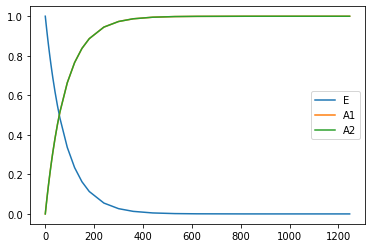

In [5]:
# have the program run your ODE to see how it behaves
prof = test.run_ODEs()
print(test.get_matrices())#hoe the info in the system looks

In [6]:
# now for making theoretical data if there is no real data
#syntax is derived from basic scipy integrating syntax
def diff_data(t, init, rate_const): #function that recieves data needs to take these parameters. t denotes the range over which it is executed, init denotes initial conditions, rate_const denotes the rate constants used
    CE, CA1, CA2, CtE,Cprecat, Ccat, Ccatdead = init # though the system is simple it does have 7 initial conditions, this is due to the fact that we want to fit it with a more complex system that includes everything later
    k1= rate_const[0] #get out the individual rate constants from rate_const
    dEdt = -k1*CE #write out the reactions
    dA1dt = k1*CE
    dA2dt = k1*CE
    return dEdt, dA1dt, dA2dt,0,0,0,0 #amount of outputs needs to be equal to the amount of initial conditions, add zeros if the amount of changing parameters is less

3


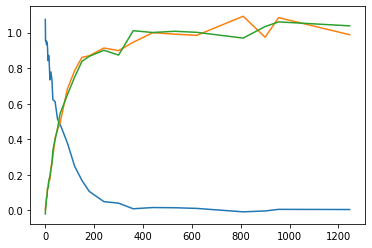

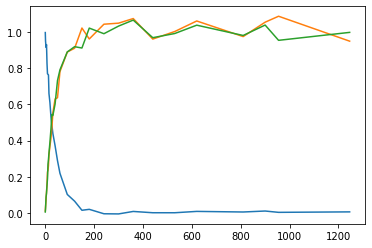

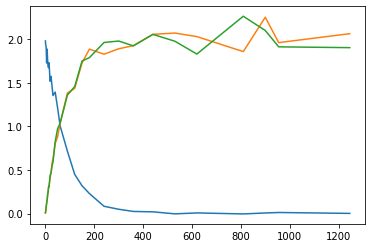

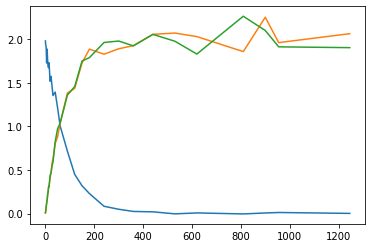

In [7]:
#now that we have a system lets make data out of it
#the make data function looks like this make_data (system,timespan ,Ts,inits,ks,kin_params = None,var_noise = 0, stat_noise = 0)
#system is the differential system the data is made for, timespan is the time measured over, Ts is all temperatures you want simulated
#inits is all the inits you want simulated, ks is the value of the rate constants, var_noise and stat_noise allow you to add noise to data
# kin_params is for when simulations are done at different temperatures, because the rate constants change of course. the structure is [Temperature_the_base_rate_constant_is_defined_at, [Eact1,Eact2,etc...]]
data = prg.make_data(diff_data,timespan ,[300,400],[[1,0,0,0,1,0,0],[2,0,0,0,2,0,0]],ks,var_noise = 0.05, stat_noise = 0.01,kin_params = [300,[7573]])
#out differential had 3 significant parameters, so the lenth of the output matrix is 3
print(len(data[0]['y']))
#there are now 4 runs since we defined 2 initial conditions and 2 temperatures
plt.figure() #first run is first initial condition, first temperature
plt.plot(data[0]['t'],data[0]['y'][0])
plt.plot(data[0]['t'],data[0]['y'][1])
plt.plot(data[0]['t'],data[0]['y'][2])

plt.figure() #second run is first initial condition, second temperature
plt.plot(data[1]['t'],data[1]['y'][0])
plt.plot(data[1]['t'],data[1]['y'][1])
plt.plot(data[1]['t'],data[1]['y'][2])

plt.figure() #third run is second initial condition, first temperature
plt.plot(data[2]['t'],data[2]['y'][0])
plt.plot(data[2]['t'],data[2]['y'][1])
plt.plot(data[2]['t'],data[2]['y'][2])

plt.figure() #fourth run is second initial condition, second temperature
plt.plot(data[3]['t'],data[2]['y'][0])
plt.plot(data[3]['t'],data[2]['y'][1])
plt.plot(data[3]['t'],data[2]['y'][2])


In [8]:
#this cell is to shwo how you make custom data, if there is real data it can be implemeted in this format
# t = [0,1,2,3,4,5] #each run had a time
# y = [np.array([1,0.7,0.55,0.45,0.35,0.3]),
#      np.array([0,0.4,0.55,0.65,0.75,0.8])] #it has the concentration steps at each time, (can be list of lists or list of arrays)
# y = [[1,0.7,0.55,0.45,0.35,0.3],
#     [0,0.4,0.55,0.65,0.75,0.8]] #data as list of lists
# T = 300 #temperature measured at
# init = [1, 0, 0, 0, 1, 0, 0] #initial conditions for the measurement

#runs can be done in parallel, here we'll do 2
# t2 = [0,1,2,3,4,5]
# y2 = [np.array([2,1.2,0.95,0.85,0.75,0.65]),
#      np.array([0,1,1.2,1.4,1.5,1.6])]
# T2 = 400
# init2 = [2, 0, 0, 0, 1, 0, 0]

# data = [{'t':t, 'y':y, 'T':T, 'init':init},{'t':t2, 'y':y2, 'T':T2, 'init':init2}] #this is how to combine all the data in one dictionary

2.8690822383035015
2.8690822383035015
2.8690822383035015
2.869082352066112
-387.59805145069316
-1.1378671444492134
2.914082210641295
2.914082208412666
2.869100426694407
2.913790697192927
2.9140995351673635
2.9140995351689174
2.914082210509032
2.914099364225525
2.9140995351673635
2.9140995351673635
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 6
    # variables        = 1
    chi-square         = 495.321524
    reduced chi-square = 99.0643047
    Akaike info crit   = 28.4806857
    Bayesian info crit = 28.2724452
[[Variables]]
    k0:  0.01166288 +/- 5664.51027 (48568688.99%) (init = 0.01)
1.938920492887274
1.938920492887274
1.938920492887274
1.9389208362692532
-7.642243238870097
2.9901005116006156
2.9901005243556367
2.224565690476514
2.9895736820676984
2.992105509765575
2.992105509743478
2.99009871891924
2.9920861056635086
2.9921053787214364
2.992105509765575
2.992105509765575
[[Fit Statistics]]
    # fitting method   = leastsq

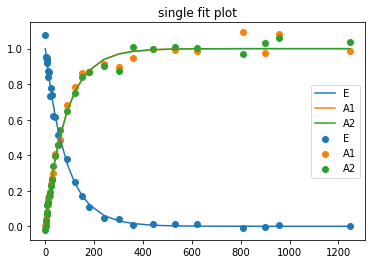

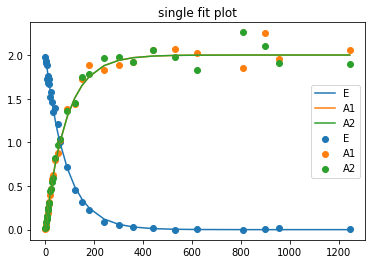

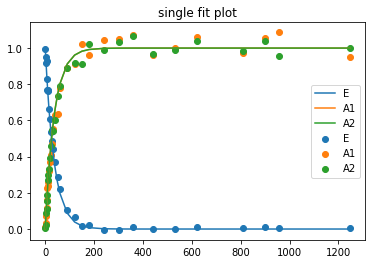

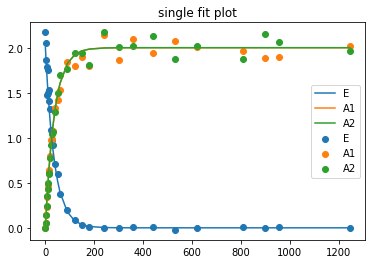

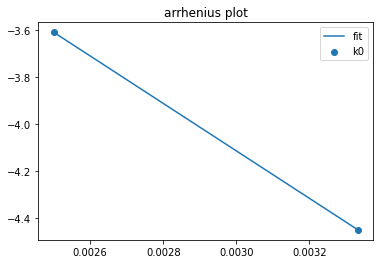

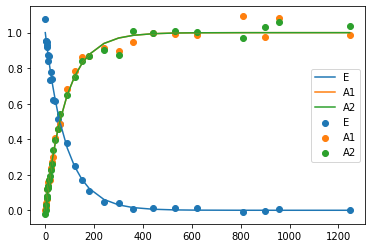

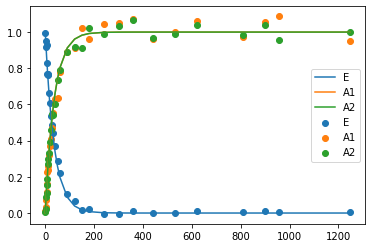

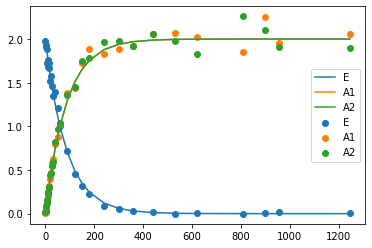

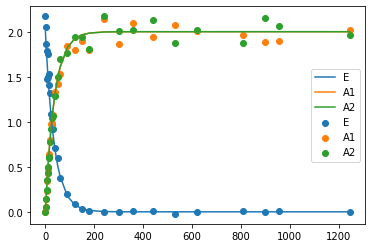

In [9]:
# remember the ODE system we made, lets fit the data to that system
test_fit_1 = prg.fit_data(data, test.get_matrices()) #we make a fitting set with the fit_data class, ODE systems need to be converted to the right reaction matrix with the get_matrices() function
test_fit_1.fit_full(0) #a full fit means we find all rate constants and then combine them into guesses for the kinetic parameters. We then also guess the kinetic parameters
#the syntax of the function is fit_full(system_num, iterations = 1000, iterations_full = 1000)
# system_num denotes which system we fit, if there is only one this is 0, we'll see later how we can play with convenietly fitting mutiple systems.
#number of iterations can also be changed if desired

1.0529095320631705
1.0529095320631705
1.0529095320631705
1.0529095749896722
-15.797435324284832
0.740494469198437
1.0985534717004746
1.098553461189094
1.0540745369505267
1.1036356389661928
1.103635637665188
1.100371834851401
1.1037067248846155
1.1037067248383448
1.1036446472395374
1.1037065448957923
1.1037068136372357
1.1037068136372357
1.1037068136372357
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 6
    # variables        = 1
    chi-square         = 143.842122
    reduced chi-square = 28.7684244
    Akaike info crit   = 21.0617411
    Bayesian info crit = 20.8535006
[[Variables]]
    k0:  0.01591923 +/- 116.303338 (730583.72%) (init = 0.01)


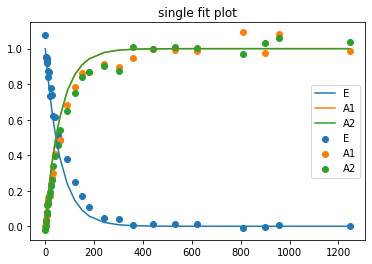

In [10]:
#now to exhibit all different types of fitting
test_fit_1.fit_one(0,0) #this is the function to fit a single system to a single dataset, first argumet is the dataset that is fit
#in this dataset 0 (first initial condition, first temperature), and the second argument is the system of ODE's, this is 0 since we only have one system

1.0529095320631705
1.0529095320631705
1.0529095320631705
1.0529095749896722
-15.797435324284832
0.740494469198437
1.0985534717004746
1.098553461189094
1.0540745369505267
1.1036356389661928
1.103635637665188
1.100371834851401
1.1037067248846155
1.1037067248383448
1.1036446472395374
1.1037065448957923
1.1037068136372357
1.1037068136372357
1.1037068136372357
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 6
    # variables        = 1
    chi-square         = 143.842122
    reduced chi-square = 28.7684244
    Akaike info crit   = 21.0617411
    Bayesian info crit = 20.8535006
[[Variables]]
    k0:  0.01591923 +/- 116.303338 (730583.72%) (init = 0.01)
0.9217432625846216
0.9217432625846216
0.9217432625846216
0.9217434230023887
-3.7758159620897795
1.4050047421999738
1.4050047360313953
0.9323980791620958
1.4047697997110653
1.406105572131246
1.4061055721193285
1.4050031846884634
1.406094968100269
1.406105504047784
1.406105572131246
1.4061

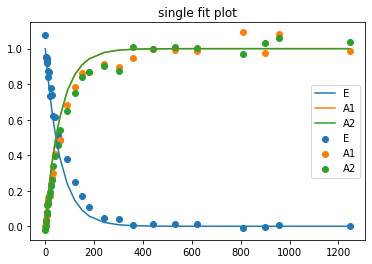

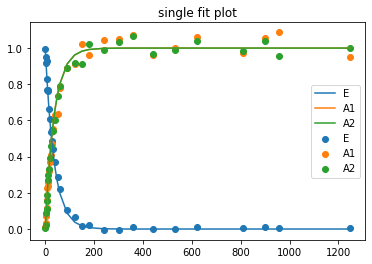

In [11]:
#fit many is for fittin many datasets with the same system at once, the first argument is now a list of all datasets you want to fit
test_fit_1.fit_many_entries([0,1],0) #try it out, there ar 4 datasets so [0:] also works for example

In [12]:
#now for an exmple that takes multiple constants and systems of ODE's into account
ks_2 = [0.01209668296564242, 0.012690318715024702] #now we have 2 constants

concs_2 = [1,0,0,1,0]# all have the same starting conditions



reactions_2 = {1:["ks[0]*concs[0]"],
               2:["ks[1]*concs[3]"]}#there are 2 reactions now, one is substrate depleteion, the second is catalyst death

matrix_2 = {"dEdt": {1:-1},
          "dA1dt": {1:1},
          "dA2dt": {1:1},
         "dprecatdt": {2:-1},
         "ddeadcatdt": {2:1}} #all the species, and teh reactions they participate in

to_run_2 = [{1:1,2:1},{1:1}] #now comes the part where we make 2 systems, one is with catalyst death , so it inludes reaction 1 and 2,
#the second is without catalyst dath, so it only includes the first reactions, the reason this is a dictionary is shown in test_6 below

In [13]:
test_2 = prg.ODE_systems(reactions_2,matrix_2,ks_2,concs_2,to_run_2) #make ODE systems out of it, if to run is included it automatically
#detects how many systems there are, and makes them.

[[{'dEdt': {1: -1}, 'dA1dt': {1: 1}, 'dA2dt': {1: 1}, 'dprecatdt': {2: -1}, 'ddeadcatdt': {2: 1}}, [0.01209668296564242, 0.012690318715024702], {1: 'ks[0]*concs[0]', 2: 'ks[1]*concs[3]'}, [1, 0, 0, 1, 0], 2], [{'dEdt': {1: -1}, 'dA1dt': {1: 1}, 'dA2dt': {1: 1}}, [0.01209668296564242, 0], {1: 'ks[0]*concs[0]'}, [1, 0, 0], 2]]


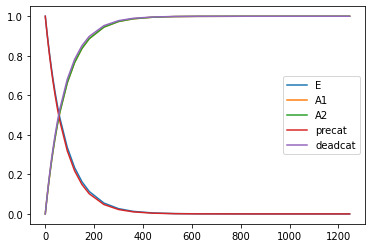

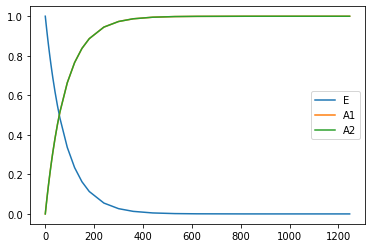

In [14]:
#Here we now see that th first system is with catalyst death, and the second system is without
# for the second system the unneeded second reaction constant is set to 0, and unneeded concentrations are automatically dropped.
prof_2 = test_2.run_ODEs()
print(test_2.get_matrices())

2.8690822383035015
2.8690822383035015
2.8690822383035015
2.869082352066112
2.8690822383035015
-644.7834491307166
-12.882127565467384
2.85840766971274
2.9136897920579727
2.913689802898684
2.9136897920579727
2.884094688424848
2.9140995185401004
2.914099518609092
2.9140995185401004
2.9136993973623895
2.914095987845381
2.9140995299563484
2.9140995299563484
2.9140995299563484
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 6
    # variables        = 2
    chi-square         = 1751.56797
    reduced chi-square = 437.891992
    Akaike info crit   = 38.0590431
    Bayesian info crit = 37.6425620
##  Warning: uncertainties could not be estimated:
    k1:  at initial value
[[Variables]]
    k0:  0.01166349 (init = 0.01)
    k1:  0.01000000 (init = 0.01)
1.938920492887274
1.938920492887274
1.938920492887274
1.9389208362692532
1.938920492887274
-35.487218734803534
2.961404618268741
2.9614046692284814
2.961404618268741
2.60401928577539
2.9920

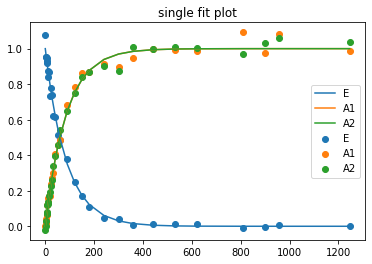

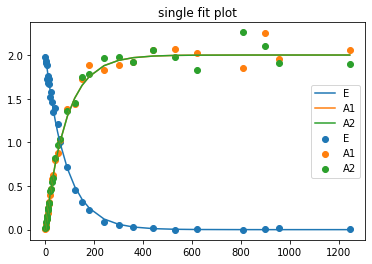

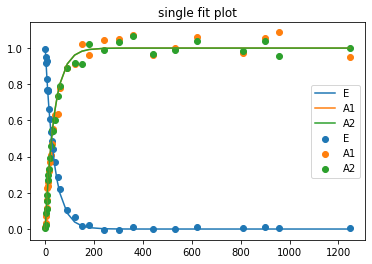

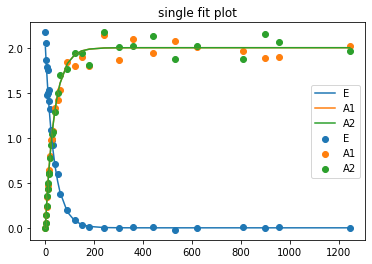

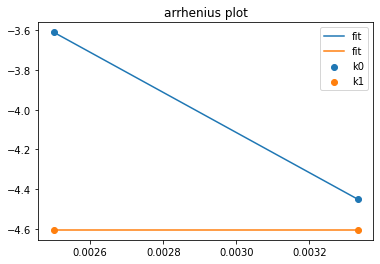

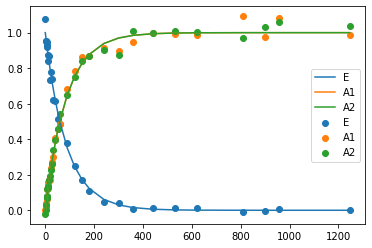

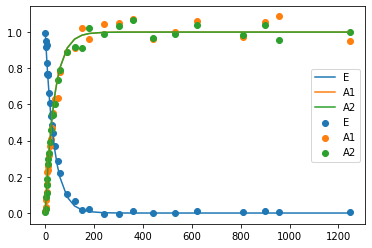

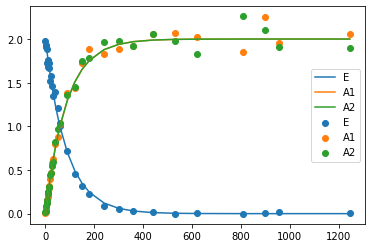

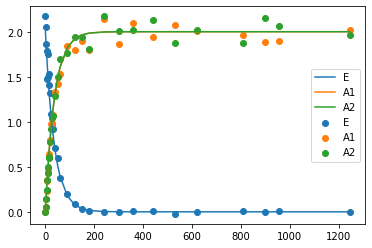

In [15]:
#and again some examples of fitting
test_fit_2 = prg.fit_data(data, test_2.get_matrices())
test_fit_2.fit_full(0)

1.0529095320631705
1.0529095320631705
1.0529095320631705
1.0529095749896722
1.0529095320631705
-15.797435324284832
0.7404944691984352
1.0952683033313222
1.0952682900970352
1.0952683033313222
1.0646971467474315
1.1036338684860274
1.1036338671690604
1.1036338684860274
1.0973383689381329
1.103706809679668
1.1037068096894371
1.103706809679668
1.103633864132774
1.1037061740876977
1.1037068130908376
1.1037068130908376
1.1037068130908376
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 6
    # variables        = 2
    chi-square         = 143.842122
    reduced chi-square = 35.9605305
    Akaike info crit   = 23.0617411
    Bayesian info crit = 22.6452601
##  Warning: uncertainties could not be estimated:
    k1:  at initial value
[[Variables]]
    k0:  0.01591997 (init = 0.01)
    k1:  0.01000000 (init = 0.01)


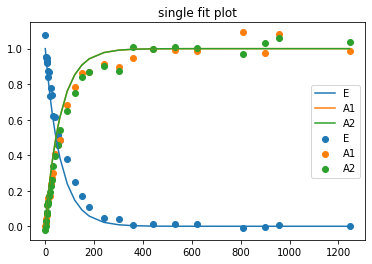

In [16]:
test_fit_2 = prg.fit_data(data, test_2.get_matrices())
test_fit_2.fit_one(0,1)

0.9217432625846216
0.9217432625846216
0.9217432625846216
0.9217434230023887
0.9217432625846216
-15.93757778201511
1.4055314045245435
1.4055314090515971
1.4055314045245435
1.0557497472447623
1.404504142303837
1.406105568584719
1.4061055685683828
1.406105568584719
1.4055312500422432
1.4061002169515997
1.4061055527029651
1.406105568584719
1.406105568584719
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 6
    # variables        = 2
    chi-square         = 443.130129
    reduced chi-square = 110.782532
    Akaike info crit   = 29.8126240
    Bayesian info crit = 29.3961430
##  Warning: uncertainties could not be estimated:
    k1:  at initial value
[[Variables]]
    k0:  0.02717128 (init = 0.01)
    k1:  0.01000000 (init = 0.01)
0.9217432625846216
0.9217432625846216
0.9217432625846216
0.9217434230023887
0.9217432625846216
-3.7758159620897795
1.4050047421999738
1.4050047360313953
1.4050047421999738
0.9323980791620958
1.40476979971106

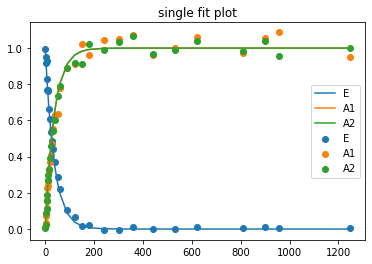

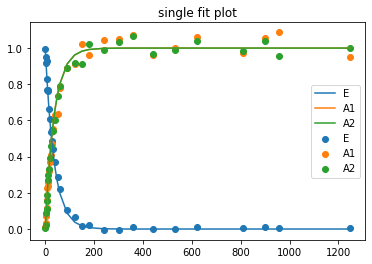

In [17]:
test_fit_2.fit_many_systems(1,[0,1])

1.0529095320631705
1.0529095320631705
1.0529095320631705
1.0529095749896722
1.0529095320631705
-9.662806500947843
-1.6721451423693952
1.0431077894730798
1.1031793040248787
1.1031793005262824
1.1031793040248787
1.0548254187234312
1.1037067033186774
1.1037067032670909
1.1037067033186774
1.1031937251434432
1.103703009237448
1.1037068136371095
1.1037068136371095
1.1037068136371095
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 6
    # variables        = 2
    chi-square         = 474.864195
    reduced chi-square = 118.716049
    Akaike info crit   = 30.2276163
    Bayesian info crit = 29.8111353
##  Warning: uncertainties could not be estimated:
    k1:  at initial value
[[Variables]]
    k0:  0.01591924 (init = 0.01)
    k1:  0.01000000 (init = 0.01)
1.0529095320631705
1.0529095320631705
1.0529095320631705
1.0529095749896722
1.0529095320631705
-15.797435324284832
0.7404944691984352
1.0952683033313222
1.0952682900970352
1.095268303

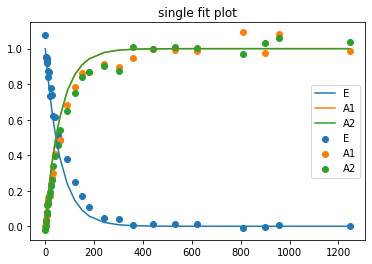

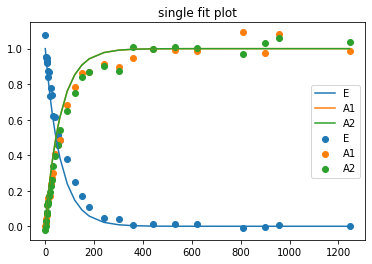

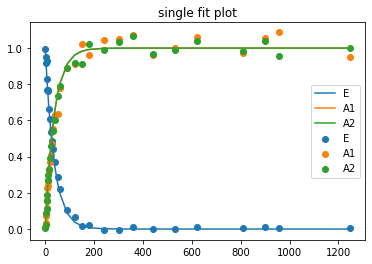

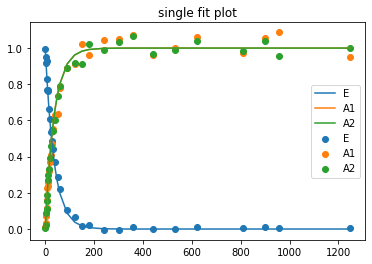

In [18]:
test_fit_2.fit_many([0,1],[0,1])

In [19]:
#now for a highly complex system example
ks_6 = [0.01209668296564242, 0.01517495478255645, 0.0042608145032644508, 0.0897487647678990227, 0.032891811706016034, 0.012690318715024702]
concs_6 = [1,0,0,0,1,0,0]

reactions_6 = {1: ["ks[0]*concs[0]*concs[4]","ks[0]*concs[0]"], #note that we now define that reaction 1 can have 2 different options
               2: ["ks[1]*concs[0]*concs[1]"],
               3: ["ks[2]*concs[2]*concs[3]"],
               4 : ["ks[3]*concs[3]*concs[4]"],
               5: ["ks[4]*concs[5]*CH2"],
               6: ["ks[5]*concs[4]"]}

matrix_6 = {"dEdt": {1:-1, 2:-1, 3:1}, #example of how a more complex matrix looks
          "dA1dt": {1:1, 2:-1, 3:1, 4:2},
          "dA2dt": {1:1, 2:1, 3:-1},
            "dtEdt": {2:1, 3:-1, 4:-1},
         "dprecatdt": {1:-1, 4:-1, 5:1, 6:-1},
         "dcatdt": {1:1, 4:1, 5:-1},
           "dcatdeaddt": {6:1}}

to_run_6 = [{1:1,2:1,3:1,4:1,5:1,6:1},{1:1,2:1,3:1,5:1,6:1},{1:2,2:1,3:1,4:1,5:1,6:1}] #the last entry explains why this is a dictionary
#if a researcher wants to simultaneously runs systems with different reactions they can be selected per system in the to_run parameter dictionaries

In [20]:
test_6 = prg.ODE_systems(reactions_6,matrix_6,ks_6,concs_6,to_run = to_run_6)

[[{'dEdt': {1: -1, 2: -1, 3: 1}, 'dA1dt': {1: 1, 2: -1, 3: 1, 4: 2}, 'dA2dt': {1: 1, 2: 1, 3: -1}, 'dtEdt': {2: 1, 3: -1, 4: -1}, 'dprecatdt': {1: -1, 4: -1, 5: 1, 6: -1}, 'dcatdt': {1: 1, 4: 1, 5: -1}, 'dcatdeaddt': {6: 1}}, [0.01209668296564242, 0.01517495478255645, 0.004260814503264451, 0.08974876476789902, 0.03289181170601604, 0.012690318715024702], {1: 'ks[0]*concs[0]*concs[4]', 2: 'ks[1]*concs[0]*concs[1]', 3: 'ks[2]*concs[2]*concs[3]', 4: 'ks[3]*concs[3]*concs[4]', 5: 'ks[4]*concs[5]*CH2', 6: 'ks[5]*concs[4]'}, [1, 0, 0, 0, 1, 0, 0], 6], [{'dEdt': {1: -1, 2: -1, 3: 1}, 'dA1dt': {1: 1, 2: -1, 3: 1}, 'dA2dt': {1: 1, 2: 1, 3: -1}, 'dtEdt': {2: 1, 3: -1}, 'dprecatdt': {1: -1, 5: 1, 6: -1}, 'dcatdt': {1: 1, 5: -1}, 'dcatdeaddt': {6: 1}}, [0.01209668296564242, 0.01517495478255645, 0.004260814503264451, 0, 0.03289181170601604, 0.012690318715024702], {1: 'ks[0]*concs[0]*concs[4]', 2: 'ks[1]*concs[0]*concs[1]', 3: 'ks[2]*concs[2]*concs[3]', 5: 'ks[4]*concs[5]*CH2', 6: 'ks[5]*concs[4]'}, 

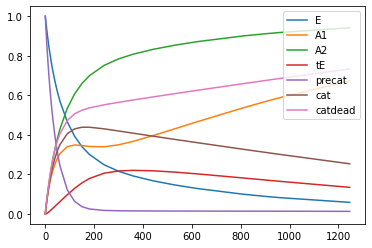

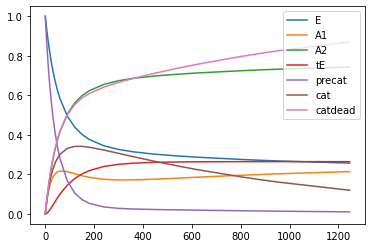

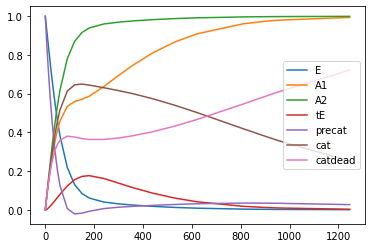

In [21]:
#and again we fit everything
prof_6 = test_6.run_ODEs()
print(test_6.get_matrices())


0.6531056790777557
0.6531056790777557
0.6531056790777557
0.6531058132455381
0.6531057077590473
0.6531056551007766
0.6531056790777557
0.6531056857065933
0.6531055973369493
-4.331058989538107
0.5385544247984323
0.7542845168538641
0.7542844691723856
0.7542845153177363
0.7542845080591098
0.7542845168538641
0.7542845179033858
0.7542845015290061
0.8038809023867362
0.8038810060281399
0.8038809039227108
0.8038809048660784
0.8038809023867362
0.8038809004812368
0.803881008200922
1.0554894906138848
1.055489471852317
1.0554894891561728
1.0554894880228396
1.0554894906138848
1.0554894912795652
1.055489484999168
1.0002272987457737
1.090309669921389
1.0903096685009632
1.090309668817
1.0903096684632698
1.090309669921389
1.09030967001753
1.090309669011353
1.1056653065713693
1.1056653163495382
1.1056653054682086
1.1056653054682086
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 6
    # variables        = 6
    chi-square         = 997.583203
    re

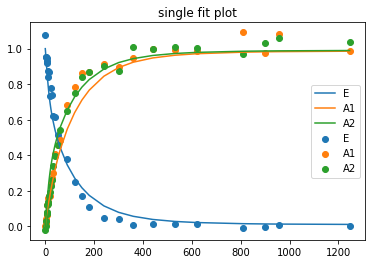

In [22]:
test_fit_6 = prg.fit_data(data, test_6.get_matrices())
test_fit_6.fit_one(0,1,iterations = 40) #you can set the amount of iterations

1.5630242033375157
1.5630242033375157
1.5630242033375157
1.5630241372062836
1.5630241486046201
1.5630242353929975
1.5630242477442056
1.5630242358300597
1.5630239948500368
-4.601020774321515
-212.64215370859444
-1.9237880348713667
1.8701015709446014
1.870101804630428
1.870101550260907
1.870101576426873
1.8701016092572431
1.8701016021369
1.8701013278777892
2.22911704874287
2.229117119853747
2.229117049148926
2.229117048463677
2.229117074573116
2.229117073356623
2.2291168585530516
2.584796843048869
2.584796702299128
2.5847968538403405
2.5847968406594437
2.5847968533092147
2.584796850305712
2.584796770732418
2.7560914924136863
2.756091586356678
2.75609150162787
2.756091489795561
2.7560915049349926
2.7560914960366008
2.756091433664407
2.7401697992803675
2.817767345693182
2.817767291025481
2.817767291025481
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 6
    # variables        = 6
    chi-square         = 3804.86907
    reduced chi-s

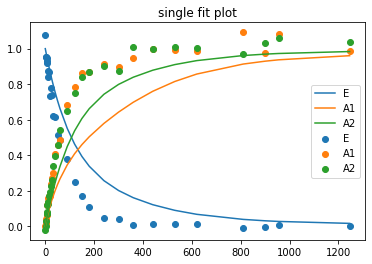

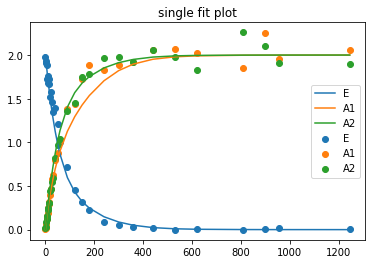

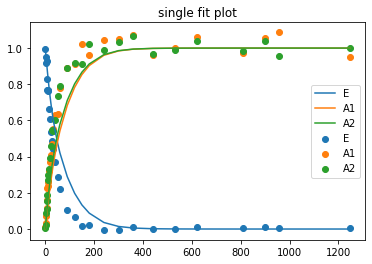

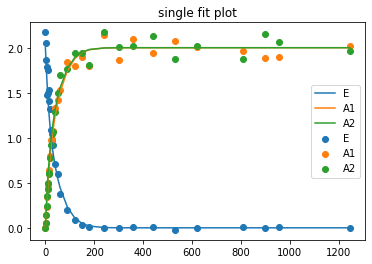

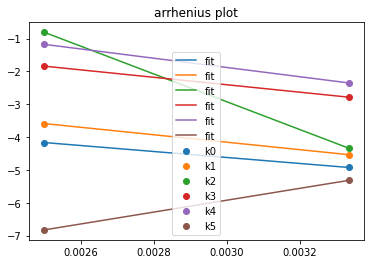

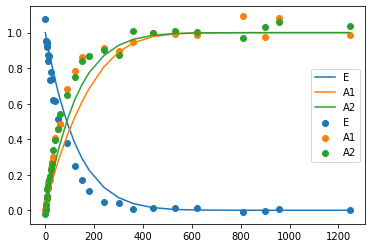

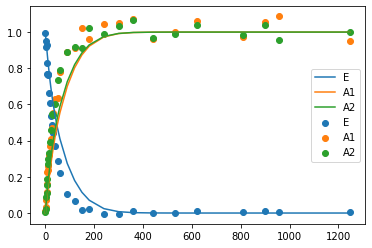

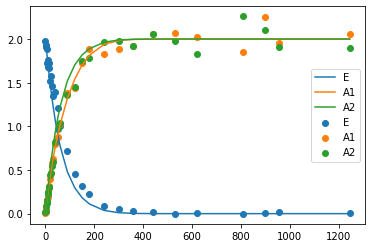

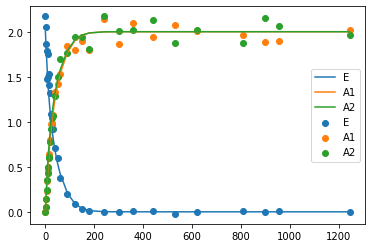

In [23]:
test_fit_6.fit_full(0, iterations = 40, iterations_full = 100)